In [6]:
import tensorflow as tf
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm import tqdm
import math
import os
import matplotlib.pyplot as plt

from kapre import STFT, Magnitude, ApplyFilterbank, MagnitudeToDecibel

import sys
sys.path.append("../")
from src.dataloader import SpokenDataLoader

gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Language classification

In [ ]:
PATHS = {"rnn": "../results/cross_validation_rnn_language_run_2/", 
         "cnn_1d": "../results/cross_validation_cnn_1d_language_run_2/", 
         "cnn_2d": "../results/cross_validation_cnn_2d_language_run_1/", 
         "cnn_effnet": "../results/cross_validation_cnn_effnet_language_run_2/", 
         "transformer": "../results/cross_validation_transformer_language_run_1/", 
         "tiny_cnn_most_accurate": "../results/cross_validation_tiny_cnn_language_accurate/", 
         "tiny_cnn_fastest": "../results/cross_validation_tiny_cnn_language_fastest/", 
         "tiny_cnn_fittest": "../results/cross_validation_tiny_cnn_language_fittest/"}

In [33]:
results = {}
for key, path in PATHS.items():
    test_accs = []
    for fold in os.listdir(path):
        result = pd.read_csv(path + fold + "/results.csv")
        test_accs.append(result["accuracy"].values[-1])

    results[key] = test_accs

# print mean acc and sd for each
for key, accs in results.items():
    print(key, np.mean(accs), np.std(accs))

# plot results as boxplots
plt.boxplot(results.values())
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8], results.keys())
plt.ylabel("Test Accuracy")
plt.xlabel("Model")
plt.title("Languages - Cross Validation Results")
plt.show()

In [10]:
MODEL_PATHS = {"rnn": "", 
         "cnn_1d": "", 
         "cnn_2d": "", 
         "cnn_effnet": "", 
         "transformer": "", 
         "tiny_cnn_most_accurate": "../models/evonas_languages_accurate.h5", 
         "tiny_cnn_fastest": "../models/evonas_languages_fastest.h5", 
         "tiny_cnn_fittest": "../models/evonas_languages_fittest.h5"}

In [11]:
for key, path in MODEL_PATHS.items():
    if path != "":
        model = tf.keras.models.load_model(path, custom_objects={'STFT': STFT,
                                                          'Magnitude': Magnitude,
                                                          'ApplyFilterbank': ApplyFilterbank,
                                                          'MagnitudeToDecibel': MagnitudeToDecibel})
        print(key)
        model.summary()

tiny_cnn_most_accurate
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 stft_5 (STFT)               (None, 55, 49, 1)         0         
                                                                 
 magnitude_5 (Magnitude)     (None, 55, 49, 1)         0         
                                                                 
 apply_filterbank_5 (ApplyF  (None, 55, 52, 1)         0         
 ilterbank)                                                      
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 26, 6)         12        
                                                                 
 activation_8 (Activation)   (None, 28, 26, 6)         0         
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 13, 27)        2619      
                               

## Number classification

In [ ]:
PATHS = {"rnn": "../results/cross_validation_rnn_number_run_1/", 
         "cnn_1d": "../results/cross_validation_cnn_1d_number_run_1/", 
         "cnn_2d": "../results/cross_validation_cnn_2d_number_run_1/", 
         "cnn_effnet": "../results/cross_validation_cnn_effnet_number_run_1/", 
         "transformer": "../results/cross_validation_transformer_number_run_1/", 
         "tiny_cnn_most_accurate": "../results/cross_validation_tiny_cnn_number_accurate/", 
         "tiny_cnn_fastest": "../results/cross_validation_tiny_cnn_number_fastest/", 
         "tiny_cnn_fittest": "../results/cross_validation_tiny_cnn_number_fittest/"}

rnn 0.6140624955296516 0.04074741555142693
cnn_1d 0.1326562482863664 0.015096531722931275
cnn_2d 0.565078116953373 0.05378491302342134
cnn_effnet 0.84765625 0.03702531901378698
transformer 0.7293750047683716 0.04639019580458542
tiny_cnn_most_accurate 0.17468750104308128 0.024729000448957067
tiny_cnn_fastest 0.021796874934807378 0.0031004898235206307
tiny_cnn_fittest 0.13625000230967996 0.020039025213948722


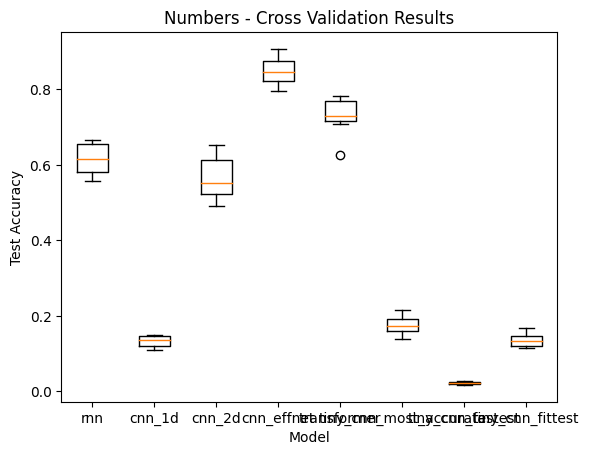

In [32]:
results = {}
for key, path in PATHS.items():
    test_accs = []
    for fold in os.listdir(path):
        result = pd.read_csv(path + fold + "/results.csv")
        test_accs.append(result["accuracy"].values[-1])

    results[key] = test_accs

# print mean acc and sd for each
for key, accs in results.items():
    print(key, np.mean(accs), np.std(accs))

# plot results as boxplots
import matplotlib.pyplot as plt
plt.boxplot(results.values())
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8], results.keys())
plt.ylabel("Test Accuracy")
plt.xlabel("Model")
plt.title("Numbers - Cross Validation Results")
plt.show()

In [14]:
MODEL_PATHS = {"rnn": "", 
         "cnn_1d": "", 
         "cnn_2d": "", 
         "cnn_effnet": "", 
         "transformer": "", 
         "tiny_cnn_most_accurate": "../models/evonas_numbers_accurate.h5", 
         "tiny_cnn_fastest": "../models/evonas_numbers_fastest.h5", 
         "tiny_cnn_fittest": "../models/evonas_numbers_fittest.h5"}

In [15]:
for key, path in MODEL_PATHS.items():
    if path != "":
        model = tf.keras.models.load_model(path, custom_objects={'STFT': STFT,
                                                          'Magnitude': Magnitude,
                                                          'ApplyFilterbank': ApplyFilterbank,
                                                          'MagnitudeToDecibel': MagnitudeToDecibel})
        print(key)
        model.summary()

tiny_cnn_most_accurate
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 stft_5 (STFT)               (None, 55, 49, 1)         0         
                                                                 
 magnitude_5 (Magnitude)     (None, 55, 49, 1)         0         
                                                                 
 apply_filterbank_5 (ApplyF  (None, 55, 52, 1)         0         
 ilterbank)                                                      
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 26, 6)         12        
                                                                 
 activation_8 (Activation)   (None, 28, 26, 6)         0         
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 13, 27)        2619      
                               

# Model Parameters

In [21]:
sys.path.append("../src/")
from baseline_models import get_rnn_model, get_cnn_2d_model, get_cnn_1d_model, get_cnn_effnet_model, get_transformer_model

In [22]:
# load all models and print summary
rnn_model, _ = get_rnn_model()
rnn_model.summary()

cnn_1d_model, _ = get_cnn_1d_model()
cnn_1d_model.summary()

cnn_2d_model, _ = get_cnn_2d_model()
cnn_2d_model.summary()

cnn_effnet_model, _ = get_cnn_effnet_model()
cnn_effnet_model.summary()

transformer_model, _ = get_transformer_model()
transformer_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_3 (Bidirecti  (None, 128, 256)          164864    
 onal)                                                           
                                                                 
 bidirectional_4 (Bidirecti  (None, 128, 512)          1050624   
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 1024)              4198400   
 onal)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 1024)              0         
                                                                 
 dense_37 (Dense)            (None, 256)               262400    
                                                      